In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np 

In [3]:
full_tweets_df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/covid_twitter.tsv", sep='\t')

In [75]:
full_tweets_df.tail()


,Unnamed: 0,created_at,text,source,retweet_count,favorite_count,year,month,day
3892,3892,2022-06-20 05:18:24,RT @CKastamonitis: Κορονοϊός: Παραδοχή «βόμβα»...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",5,0,2022,6,20
3893,3893,2022-06-20 05:15:13,Κορονοϊός - Παγώνη: «Η παραλλαγή 4 είναι πιο μ...,"<a href=""https://thestandard.gr"" rel=""nofollow...",0,0,2022,6,20
3894,3894,2022-06-20 05:14:51,Κορονοϊός: Δημοσίευμα-«βόμβα» για την προέλευσ...,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",0,0,2022,6,20
3895,3895,2022-06-20 05:14:14,Κορονοϊός: Οι νοσηλείες αυξάνονται και οι ειδι...,"<a href=""https://www.tromaktiko.gr"" rel=""nofol...",0,0,2022,6,20
3896,3896,2022-06-20 05:10:39,"""Άχρηστο βάρος πάνω στη γη""\n\n#Russia #Putin ...","<a href=""https://mobile.twitter.com"" rel=""nofo...",0,12,2022,6,20


In [5]:
full_tweets_df.sort_values('retweet_count', ascending=False)

,Unnamed: 0,created_at,text,source,retweet_count,favorite_count,year,month,day
749,749,2022-06-27 18:16:39,RT @VePZVughT9Iapw2: Για τους νεκρούς φταίνε ο...,"<a href=""http://twitter.com/download/android"" ...",152,0,2022,6,27
822,822,2022-06-27 16:04:17,RT @VePZVughT9Iapw2: Για τους νεκρούς φταίνε ο...,"<a href=""http://twitter.com/download/android"" ...",152,0,2022,6,27
817,817,2022-06-27 16:14:09,RT @VePZVughT9Iapw2: Για τους νεκρούς φταίνε ο...,"<a href=""http://twitter.com/download/android"" ...",152,0,2022,6,27
816,816,2022-06-27 16:15:19,RT @VePZVughT9Iapw2: Για τους νεκρούς φταίνε ο...,"<a href=""http://twitter.com/download/iphone"" r...",152,0,2022,6,27
624,624,2022-06-28 04:10:42,RT @VePZVughT9Iapw2: Για τους νεκρούς φταίνε ο...,"<a href=""http://twitter.com/download/android"" ...",152,0,2022,6,28
...,...,...,...,...,...,...,...,...,...
1787,1787,2022-06-24 15:13:28,#Εμβολιο #εκλογες\n#ξαφνικιτιδα #κορονοιος #κρ...,"<a href=""http://twitter.com/download/android"" ...",0,9,2022,6,24
1788,1788,2022-06-24 15:06:34,Κορονοϊός: Διαφεύγουν από τα εξουδετερωτικά αν...,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",0,0,2022,6,24
1790,1790,2022-06-24 15:05:03,"Κορονοϊός: 13 θάνατοι, 86 διασωληνωμένοι και 1...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",0,0,2022,6,24
1793,1793,2022-06-24 15:03:39,Κορονοϊός: Διαφεύγουν από τα εξουδετερωτικά αν...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0,2022,6,24


In [6]:
print(full_tweets_df.loc[[749]])

     Unnamed: 0           created_at  \
749         749  2022-06-27 18:16:39   

                                                  text  \
749  RT @VePZVughT9Iapw2: Για τους νεκρούς φταίνε ο...   

                                                source  retweet_count  \
749  <a href="http://twitter.com/download/android" ...            152   

     favorite_count  year  month  day  
749               0  2022      6   27  


In [7]:
short_tweets = full_tweets_df[['created_at','text' ]]

In [8]:
short_tweets = short_tweets.rename(columns={'created_at': 'date'} )

In [9]:
short_tweets.dtypes

date    object
text    object
dtype: object

In [10]:
pd.to_datetime(short_tweets.date).head()

0   2022-06-29 10:45:41
1   2022-06-29 10:44:48
2   2022-06-29 10:43:05
3   2022-06-29 10:39:26
4   2022-06-29 10:33:36
Name: date, dtype: datetime64[ns]

In [11]:
short_tweets['year'] = pd.DatetimeIndex(short_tweets['date']).year
short_tweets['month'] = pd.DatetimeIndex(short_tweets['date']).month
short_tweets['day'] = pd.DatetimeIndex(short_tweets['date']).day

In [12]:
short_tweets.head()

,date,text,year,month,day
0,2022-06-29 10:45:41,"RT @GKakarinos: Βέλγιο και Γερμανία, επαναλαμβ...",2022,6,29
1,2022-06-29 10:44:48,RT @GKakarinos: Σοβαρά τώρα θα κάνει κανένας α...,2022,6,29
2,2022-06-29 10:43:05,"RT @maria_alexea: Ο διάσημος ψυχολόγος λέει: ""...",2022,6,29
3,2022-06-29 10:39:26,"RT @News247gr: Κορονοϊός - Διασπορά: ""Έκρηξη"" ...",2022,6,29
4,2022-06-29 10:33:36,RT @GKakarinos: Σοβαρά τώρα θα κάνει κανένας α...,2022,6,29


In [13]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


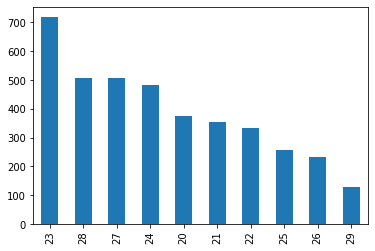

In [14]:
short_tweets['day'].value_counts().plot(kind='bar')

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [16]:
short_tweets['text'].replace('@', '' , regex=True, inplace=True)

In [17]:
short_tweets['text'].replace('rt', '', regex=True, inplace=True)

In [18]:
short_tweets['text'].replace('RT', '', regex=True, inplace=True)

In [19]:
short_tweets.head()

,date,text,year,month,day
0,2022-06-29 10:45:41,"GKakarinos: Βέλγιο και Γερμανία, επαναλαμβάνε...",2022,6,29
1,2022-06-29 10:44:48,GKakarinos: Σοβαρά τώρα θα κάνει κανένας από ...,2022,6,29
2,2022-06-29 10:43:05,"maria_alexea: Ο διάσημος ψυχολόγος λέει: ""κλε...",2022,6,29
3,2022-06-29 10:39:26,"News247gr: Κορονοϊός - Διασπορά: ""Έκρηξη"" στη...",2022,6,29
4,2022-06-29 10:33:36,GKakarinos: Σοβαρά τώρα θα κάνει κανένας από ...,2022,6,29


In [20]:
import spacy

In [21]:
!python -m spacy download el_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.6 MB 5.0 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [22]:
nlp = spacy.load('el_core_news_sm')

In [23]:
list(nlp.Defaults.stop_words)[0:20]

['έτερες',
 'κατά',
 'τον',
 'μου',
 'τρίτη',
 'μεμιάς',
 'καθώς',
 'ωσάν',
 'οποιασδήποτε',
 'ετούτοι',
 'πέρα',
 'όσοι',
 'ήσαστε',
 'έτεροι',
 'μερικά',
 'κοντά',
 'μήπως',
 'οποιουσδήποτε',
 'όσων',
 'ίδιος']

In [24]:
text = short_tweets['text'].str.cat(sep = ' ').replace("amp", ' ')

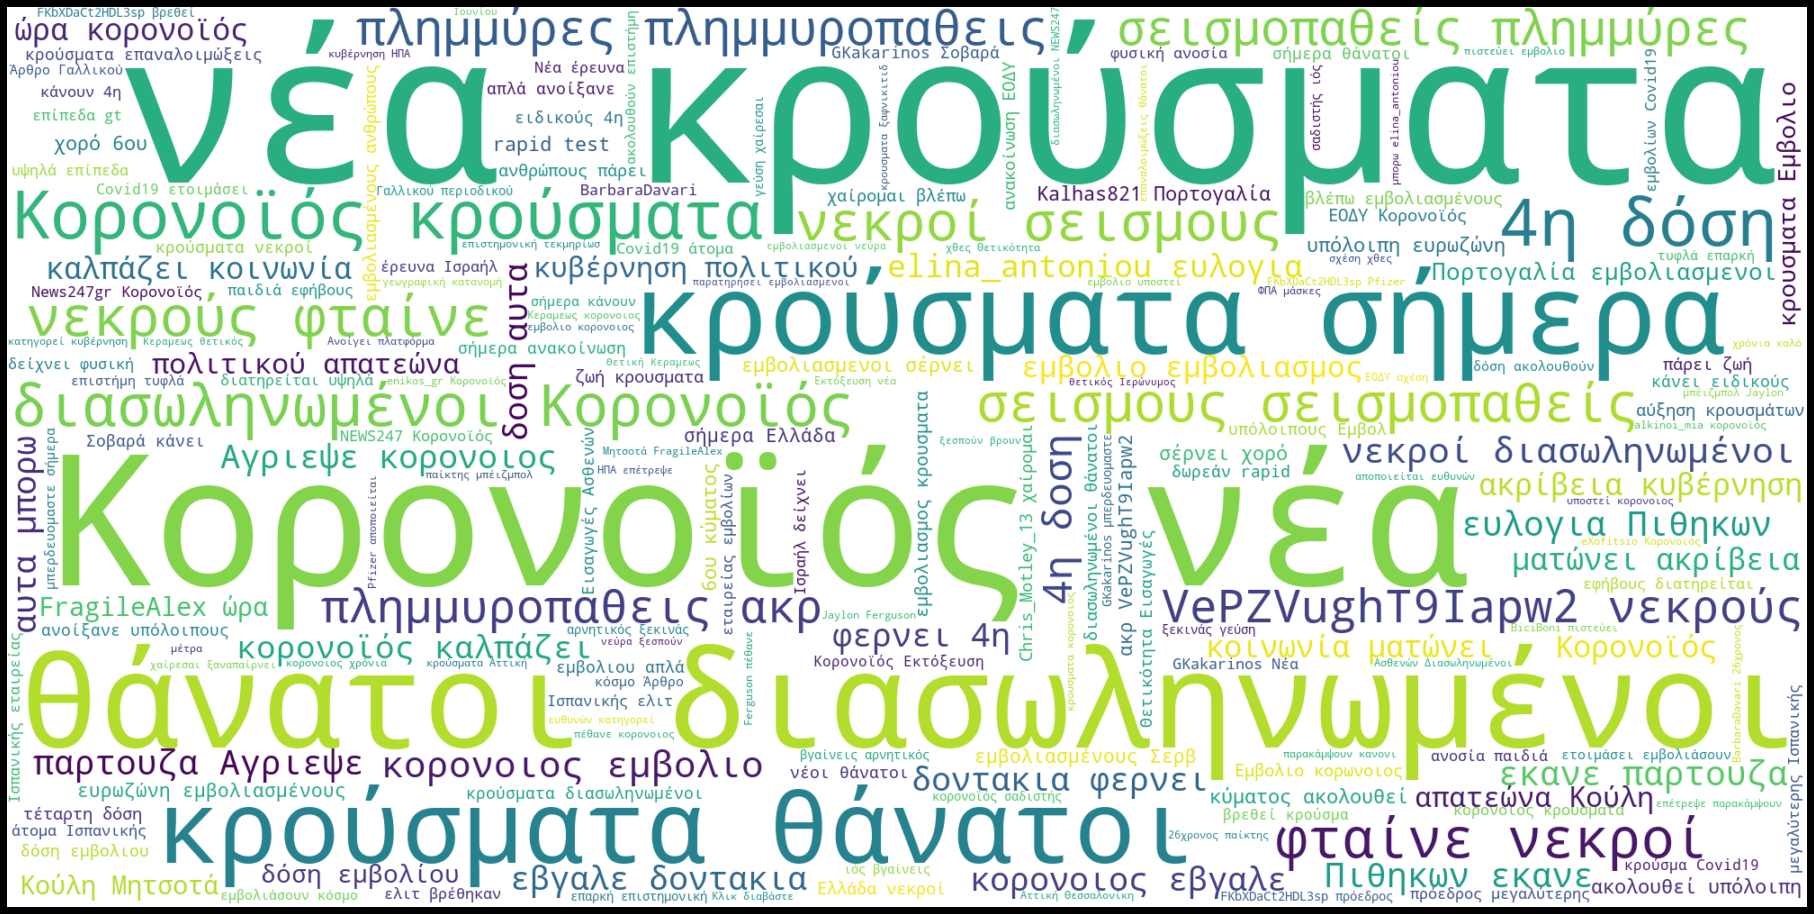

In [76]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'white'
 ).generate(text)
fig = plt.figure(
    figsize = (25, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [26]:
doc = nlp(short_tweets['text'][1])

In [27]:
for token in doc:
    print(token, token.lemma_)

   
GKakarinos GKakarinos
: :
Σοβαρά Σοβαρά
τώρα τώρα
θα θα
κάνει κάνω
κανένας κανένας
από από
τους ο
ειδικούς ειδικός
4η 4ης
δόση δόσης
του ο
# #
εμβολιου εμβολιος
ή ή
απλά απλά
την εγώ
ανοίξανε ανοίξανε
για για
όλους όλος
τους ο
υπόλοιπους υπόλοιπος
? ?


 


# #
Εμβολ Εμβολ
… …


In [28]:
' '.join(token.lemma_ for token in doc)

'  GKakarinos : Σοβαρά τώρα θα κάνω κανένας από ο ειδικός 4ης δόσης ο # εμβολιος ή απλά εγώ ανοίξανε για όλος ο υπόλοιπος ? \n\n # Εμβολ …'

In [29]:
full_doc = nlp(text)

In [30]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [31]:
clear_text[200:400]

'δόσης ο # εμβολιος ή απλά εγώ ανοίξανε για όλος ο υπόλοιπος ? \n\n # Εμβολ …   maria_alexea : ο διάσημος ψυχολόγος λέει : " κλείστε σε ο φυλακή , γιατρός και ψυχοθεραπευτός χασάπηδα και ψεύτα " . Αναφέρ'

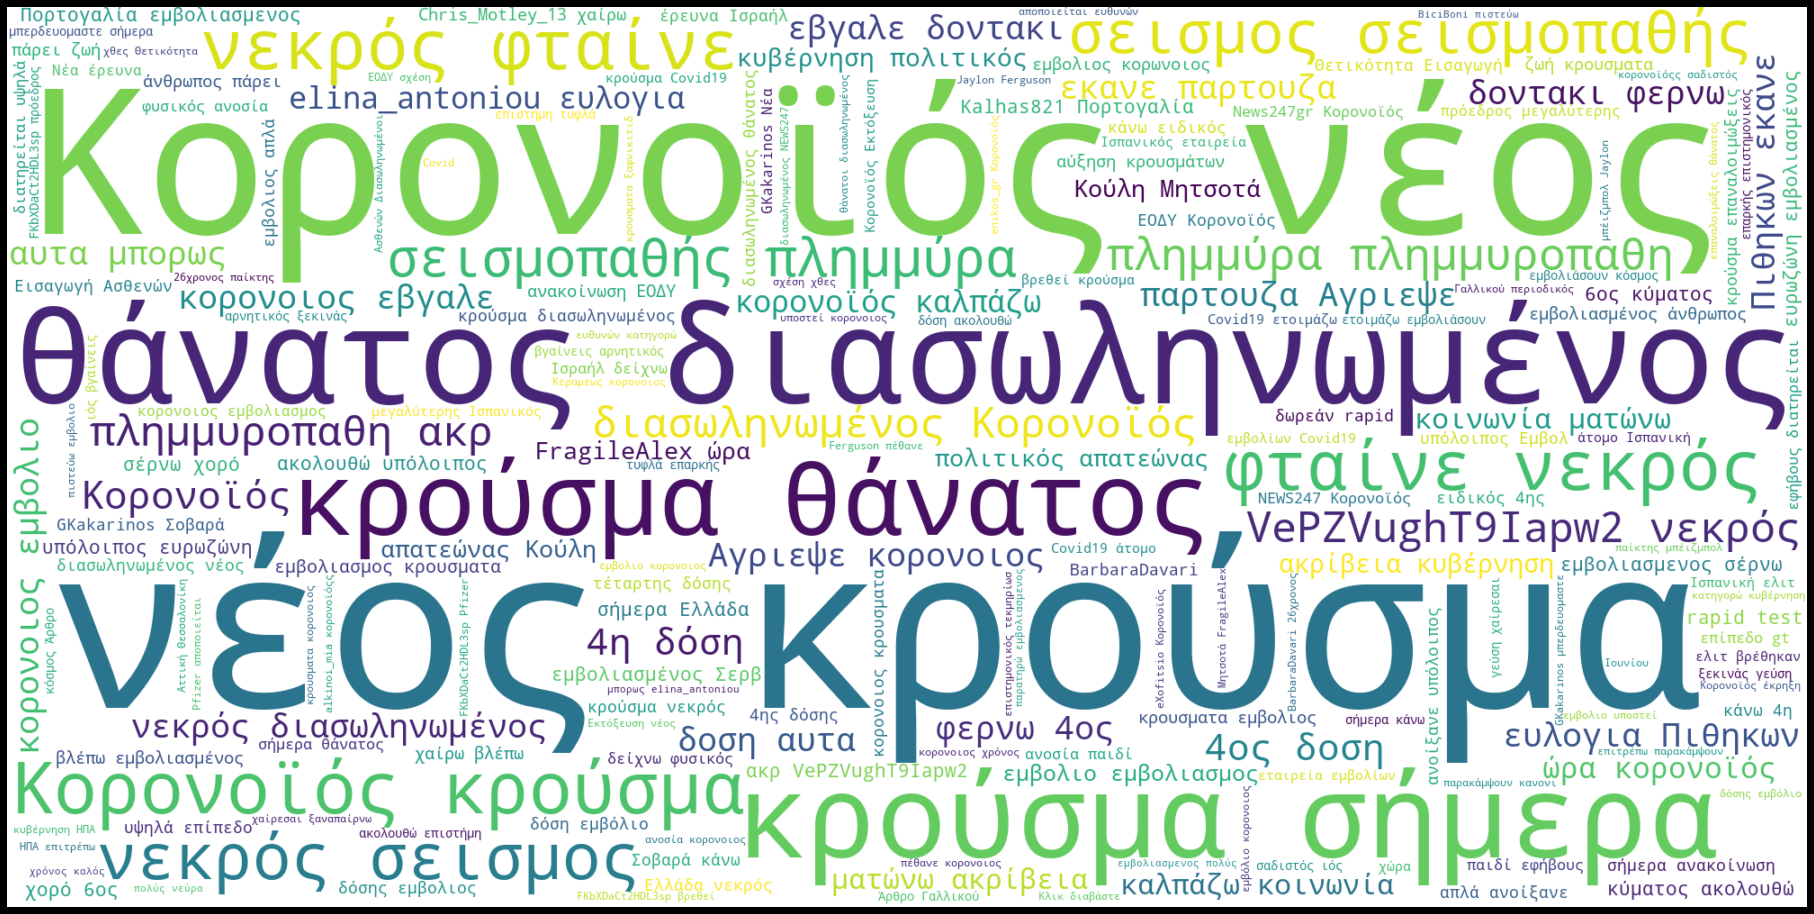

In [77]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'white'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (25, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [34]:
count_vector = cv.fit_transform(short_tweets['text'])

In [35]:
count_vector.shape

(3897, 4404)

In [36]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,01,023,027,052,054,06,064,07,...,ότ,όταν,ότι,όφελος,όχ,όχθη,όχι,ύψη,ώρα,ώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [38]:
count_vector = cv.fit_transform(short_tweets['text'])

In [39]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,06,082,084,10,11,12,13,14,15,...,φερνει,φταίει,φταίνε,χαίρομαι,χθες,χορό,χρόνια,χώρα,όμικρον,ώρα
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [41]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(short_tweets['text'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έκασε ο', 'έτερα', 'έτερων', 'ήσω', 'ίσιος', 'αλλιώ', 'αλλιώτικος', 'αλλοιώ', 'αρκετός', 'γίνομαι', 'γρήγορο', 'διο', 'είχος', 'εαυτής', 'εαυτός', 'εκάστος', 'επόμενος', 'εσένος', 'ετέραις', 'ετού', 'ετούε ο', 'εχτής', 'ιδίο', 'κάνενς', 'κάνω', 'κανενό', 'λοιπός', 'μέλλω', 'μερικός', 'μπορώ', 'μόνας', 'ολωσδιόλος', 'ορισμένος', 'οριόμενσς', 'ποία', 'πολύς', 'προτός', 'προχτής', 'σε ο', 'ταύ', 'τουλάχισε ο', 'τρίτος', 'τός', 'χωριστό'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,\n\n,...,10.000,10.474,10.528,11.972,12.082,12.537,20.000,20.084,...,φερνω,φταίει,φταίνε,χαίρομαι,χθες,χορό,χρόνος,χώρα,όμικρον,ώρα
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(short_tweets['text'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,10,12,20,4η,gkakarinos,vepzvught9iapw2,διασωληνωμένοι,δόση,ελλάδα,εμβολιο,εοδυ,θάνατοι,κορονοιος,κορονοϊός,κρουσματα,κρούσματα,νέα,νεκροί,σήμερα
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [43]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,κυβέρν,κυβέρνηση,κυβέρνησης,κυβερνήσεις,κυβερνηση,κυβερνησης,κυβερνητική,κυβερνητικα,κυβερνητικός,κυκλοφορία,κυμάνθηκε,κυρία,κυριακή,κυριακής,κυριαρχούν,κυριολεκτικά,κυτταρική
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000 κρούσματα,12 537,13 θάνατοι,4η δοση,4η δόση,88 διασωληνωμένοι,97 διασωληνωμένοι,vepzvught9iapw2 νεκρούς,κορονοιος εμβολιο,κορονοϊός 10,κορονοϊός 12,κρούσματα σήμερα,νέα κρούσματα,νεκροί σεισμους,νεκρούς φταίνε,πλημμυροπαθεις ακρ,πλημμύρες πλημμυροπαθεις,σεισμοπαθείς πλημμύρες,σεισμους σεισμοπαθείς,φταίνε νεκροί
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
results.sum(axis =0).sort_values(ascending = False)

νέα κρούσματα               590
κρούσματα σήμερα            235
4η δόση                     184
φταίνε νεκροί               151
σεισμους σεισμοπαθείς       151
σεισμοπαθείς πλημμύρες      151
πλημμύρες πλημμυροπαθεις    151
νεκροί σεισμους             151
νεκρούς φταίνε              151
πλημμυροπαθεις ακρ          150
vepzvught9iapw2 νεκρούς     150
88 διασωληνωμένοι           119
κορονοϊός 10                117
4η δοση                     115
12 537                      105
κορονοϊός 12                102
000 κρούσματα                99
97 διασωληνωμένοι            96
κορονοιος εμβολιο            95
13 θάνατοι                   93
dtype: int64

In [46]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(20)  

νέα κρούσματα               590
κρούσματα σήμερα            235
4η δόση                     184
φταίνε νεκροί               151
σεισμους σεισμοπαθείς       151
σεισμοπαθείς πλημμύρες      151
πλημμύρες πλημμυροπαθεις    151
νεκροί σεισμους             151
νεκρούς φταίνε              151
πλημμυροπαθεις ακρ          150
vepzvught9iapw2 νεκρούς     150
88 διασωληνωμένοι           119
κορονοϊός 10                117
4η δοση                     115
12 537                      105
κορονοϊός 12                102
000 κρούσματα                99
97 διασωληνωμένοι            96
κορονοιος εμβολιο            95
13 θάνατοι                   93
dtype: int64

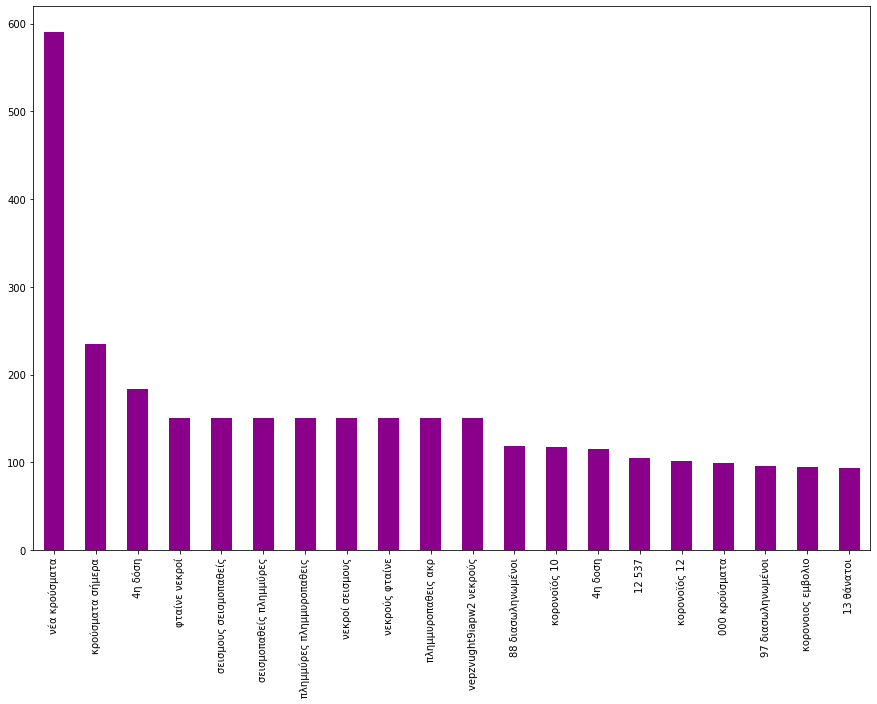

In [47]:
sum_words.sort_values(ascending = False).head(30).plot(kind = 'bar', figsize=(15,10), color='#8B008B')

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_tweets['text'])  #finds the tfidf score with normalization

In [50]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,06,082,084,10,100,11,12,13,14,...,χιλιάδες,χορό,χρόνια,χτύπησε,χώρα,ωραία,όμικρον,όροι,ώρα,ώρες
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.        0.0763831 0.        ... 0.        0.        0.       ]]


In [52]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))

cosine scores ==>  [[1.         0.0763831  0.         ... 0.         0.         0.        ]
 [0.0763831  1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.15563307 0.        ]
 [0.         0.         0.         ... 0.15563307 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [53]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

In [54]:
import nltk 
import scipy
import seaborn as sns 
import sklearn.manifold
from nltk.corpus import stopwords
import json
import urllib.parse

#Για να εμφανίζονται τα γραφήματα
%matplotlib inline

In [55]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [58]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [59]:
matrix = vec.fit_transform(short_tweets['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
wordcount_df.shape

(3897, 13161)

In [61]:
emolex_df.head()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
emolex_df[emolex_df.Anger == 1].tail()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,13104,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,13106,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,13110,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,13138,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [63]:
angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']

joy_words = emolex_df[emolex_df.Joy == 1]['word']

trust_words = emolex_df[emolex_df.Trust == 1]['word']

fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [64]:
short_tweets.head()

,date,text,year,month,day
0,2022-06-29 10:45:41,"GKakarinos: Βέλγιο και Γερμανία, επαναλαμβάνε...",2022,6,29
1,2022-06-29 10:44:48,GKakarinos: Σοβαρά τώρα θα κάνει κανένας από ...,2022,6,29
2,2022-06-29 10:43:05,"maria_alexea: Ο διάσημος ψυχολόγος λέει: ""κλε...",2022,6,29
3,2022-06-29 10:39:26,"News247gr: Κορονοϊός - Διασπορά: ""Έκρηξη"" στη...",2022,6,29
4,2022-06-29 10:33:36,GKakarinos: Σοβαρά τώρα θα κάνει κανένας από ...,2022,6,29


In [65]:
short_tweets['anger'] = wordcount_df[angry_words].sum(axis=1)

short_tweets['positivity'] = wordcount_df[positive_words].sum(axis=1)


short_tweets['joy'] = wordcount_df[joy_words].sum(axis=1)


short_tweets['disgust'] = wordcount_df[disgust_words].sum(axis=1)



short_tweets['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_tweets['trust'] = wordcount_df[trust_words].sum(axis=1)


short_tweets['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


short_tweets['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_tweets['negative'] = wordcount_df[negative_words].sum(axis=1)

short_tweets['fear'] = wordcount_df[fear_words].sum(axis=1)

In [66]:
short_tweets

,date,text,year,month,day,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2022-06-29 10:45:41,"GKakarinos: Βέλγιο και Γερμανία, επαναλαμβάνε...",2022,6,29,0,0,0,0,0,0,0,0,0,0
1,2022-06-29 10:44:48,GKakarinos: Σοβαρά τώρα θα κάνει κανένας από ...,2022,6,29,0,0,0,0,0,1,0,0,1,0
2,2022-06-29 10:43:05,"maria_alexea: Ο διάσημος ψυχολόγος λέει: ""κλε...",2022,6,29,1,1,1,0,0,0,1,1,1,1
3,2022-06-29 10:39:26,"News247gr: Κορονοϊός - Διασπορά: ""Έκρηξη"" στη...",2022,6,29,1,0,0,0,1,0,0,0,3,1
4,2022-06-29 10:33:36,GKakarinos: Σοβαρά τώρα θα κάνει κανένας από ...,2022,6,29,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3892,2022-06-20 05:18:24,CKastamonitis: Κορονοϊός: Παραδοχή «βόμβα» το...,2022,6,20,1,0,0,0,1,0,0,1,1,1
3893,2022-06-20 05:15:13,Κορονοϊός - Παγώνη: «Η παραλλαγή 4 είναι πιο μ...,2022,6,20,0,0,0,0,0,0,0,0,0,0
3894,2022-06-20 05:14:51,Κορονοϊός: Δημοσίευμα-«βόμβα» για την προέλευσ...,2022,6,20,1,0,0,0,1,0,0,1,1,1
3895,2022-06-20 05:14:14,Κορονοϊός: Οι νοσηλείες αυξάνονται και οι ειδι...,2022,6,20,0,0,0,0,0,0,0,0,0,0


In [67]:
short_tweets.set_index('date' , inplace=True)

In [68]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

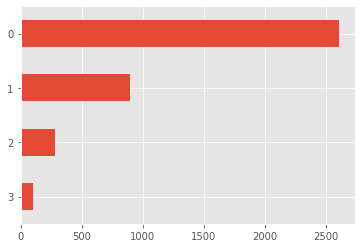

In [69]:
short_tweets['positivity'].value_counts().head(5).sort_values().plot(kind='barh')

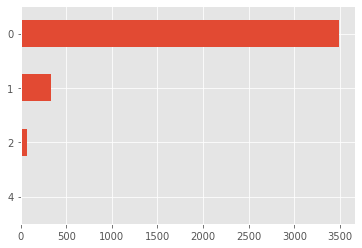

In [70]:
short_tweets['sadness'].value_counts().head(5).sort_values().plot(kind='barh')

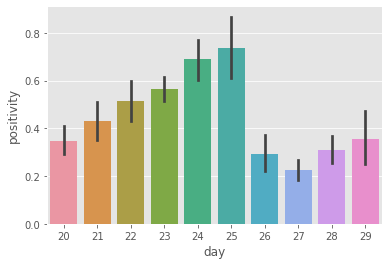

In [71]:
sns.barplot(x="day", y="positivity", data=short_tweets)

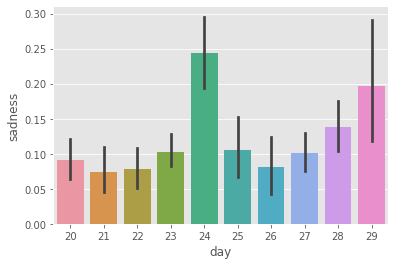

In [72]:
sns.barplot(x="day", y="sadness", data=short_tweets)

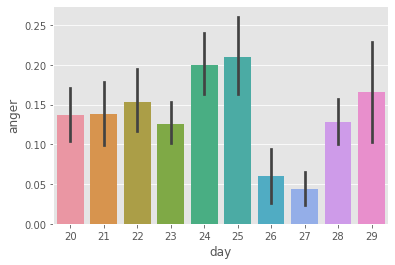

In [73]:
sns.barplot(x="day", y="anger", data=short_tweets)

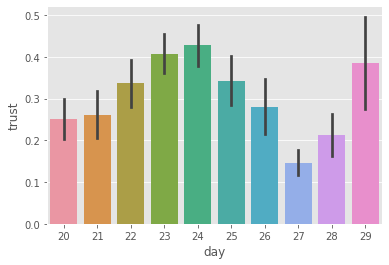

In [74]:
sns.barplot(x="day", y="trust", data=short_tweets)